In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from tensorflow import keras 
import tensorflow as tf 
import random
import cv2
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras import datasets, layers, models 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.utils import shuffle 

#ignore warning messages
import warnings
warnings.filterwarnings('ignore') 

sns.set()

In [3]:
dataset = []

data_path = "/content/drive/MyDrive/Github/HandGestures/gestures"

for folder in os.listdir(data_path):

    sub_path=data_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        dataset.append(img_arr)

In [45]:
X = np.array(dataset)
X = X/255.0
X.shape

TypeError: ignored

In [25]:
X_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
X_set = X_datagen.flow_from_directory(data_path, target_size = (224, 224), batch_size = 32, class_mode = 'sparse')

Found 4800 images belonging to 8 classes.


In [18]:
y = X_set.classes

In [19]:
X_set.class_indices

{'DOWN': 0,
 'EAST': 1,
 'NORTH': 2,
 'RTL': 3,
 'SOUTH': 4,
 'STOP': 5,
 'UP': 6,
 'WEST': 7}

In [20]:
print(X.shape)
print(y.shape)

(4800, 224, 224, 3)
(4800,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

In [ ]:
vgg = VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)

#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)

#adding output layer
prediction = Dense(8, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [ ]:
#Early stopping to avoid overfitting of model
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [ ]:
# fit the model
history = model.fit(X_train, y_train, epochs=10, validation_datat=(X_test, y_test), callbacks=[early_stop], batch_size=32, shuffle=True)

Epoch 1/10
12/12 [==============================] - 223s 18s/step - loss: 2.9931 - accuracy: 0.1441
Epoch 2/10
12/12 [==============================] - 220s 18s/step - loss: 2.5980 - accuracy: 0.1073
Epoch 3/10
12/12 [==============================] - 220s 18s/step - loss: 2.3768 - accuracy: 0.1073
Epoch 4/10
12/12 [==============================] - 220s 18s/step - loss: 2.3625 - accuracy: 0.1582
Epoch 5/10
12/12 [==============================] - 220s 18s/step - loss: 2.4636 - accuracy: 0.1102
Epoch 6/10
12/12 [==============================] - 220s 18s/step - loss: 2.4301 - accuracy: 0.1384
Epoch 7/10
12/12 [==============================] - 220s 18s/step - loss: 2.3873 - accuracy: 0.1271
Epoch 8/10
12/12 [==============================] - 220s 18s/step - loss: 2.6027 - accuracy: 0.0876
Epoch 9/10
12/12 [==============================] - 221s 18s/step - loss: 2.5036 - accuracy: 0.1356
Epoch 10/10
12/12 [==============================] - 221s 18s/step - loss: 2.1518 - accuracy: 0.1412

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

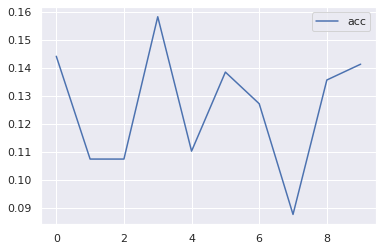

In [ ]:
# accuracies
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Training and validation accuracy")
plt.legend()
plt.xlabel('epoch')
plt.show()

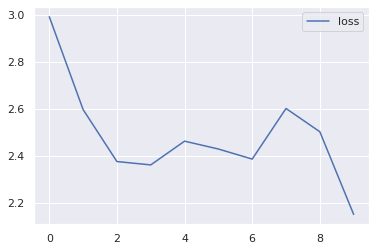

In [ ]:
# loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Training and validation losses")
plt.legend()
plt.xlabel('epoch')
plt.show()

In [ ]:
model.evaluate(X_test,y_test,batch_size=32)

3/3 [==============================] - 67s 22s/step - loss: 2.1682 - accuracy: 0.1461


[2.1681838035583496, 0.14606741070747375]

In [ ]:
#predict
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)

#get classification report
print(classification_report(y_pred,y_test))

#get confusion matrix

print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.15      0.25        89
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.15        89
   macro avg       0.12      0.02      0.03        89
weighted avg       1.00      0.15      0.25        89

[[ 0  0  0  0  0  0  0  0]
 [12 13 14  9 12 14  4 11]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


In [ ]:
#https://www.analyticsvidhya.com/blog/2021/07/step-by-step-guide-for-image-classification-on-custom-datasets/